# Task Understanding

Skin Cancer Detection

# Importing Dependancies

In [1]:
!pip install Augmentor
import Augmentor
import os 
import pathlib
import random
import PIL
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as img
import tensorflow as tf

from pathlib import Path
from tensorflow import keras
from tensorflow.keras import models, layers, optimizers, losses
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.metrics import Accuracy, Precision, Recall, F1Score, AUC
from tensorflow.keras.metrics import TruePositives, TrueNegatives, FalsePositives, FalseNegatives
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler

# Importing and Understanding the Data

In [2]:
train_set_path = Path("datasets/Skin cancer ISIC The International Skin Imaging Collaboration/Train/")
test_set_path = Path("datasets/Skin cancer ISIC The International Skin Imaging Collaboration/Test/")

In [3]:
# Finding total images in train and test sets
total_train_img = len(list(train_set_path.glob('*/*.jpg')))
print(total_train_img)

total_test_img = len(list(test_set_path.glob('*/*.jpg')))
print(total_test_img)

2239
118


In [4]:
# Getting Class Names
class_names = [folder.name for folder in train_set_path.iterdir() if folder.is_dir()]
print(class_names)

['pigmented benign keratosis', 'melanoma', 'vascular lesion', 'actinic keratosis', 'squamous cell carcinoma', 'basal cell carcinoma', 'seborrheic keratosis', 'dermatofibroma', 'nevus']


Class Name = pigmented benign keratosis
Count = 462


Class Name = melanoma
Count = 438


Class Name = vascular lesion
Count = 139


Class Name = actinic keratosis
Count = 114


Class Name = squamous cell carcinoma
Count = 181


Class Name = basal cell carcinoma
Count = 376


Class Name = seborrheic keratosis
Count = 77


Class Name = dermatofibroma
Count = 95


Class Name = nevus
Count = 357




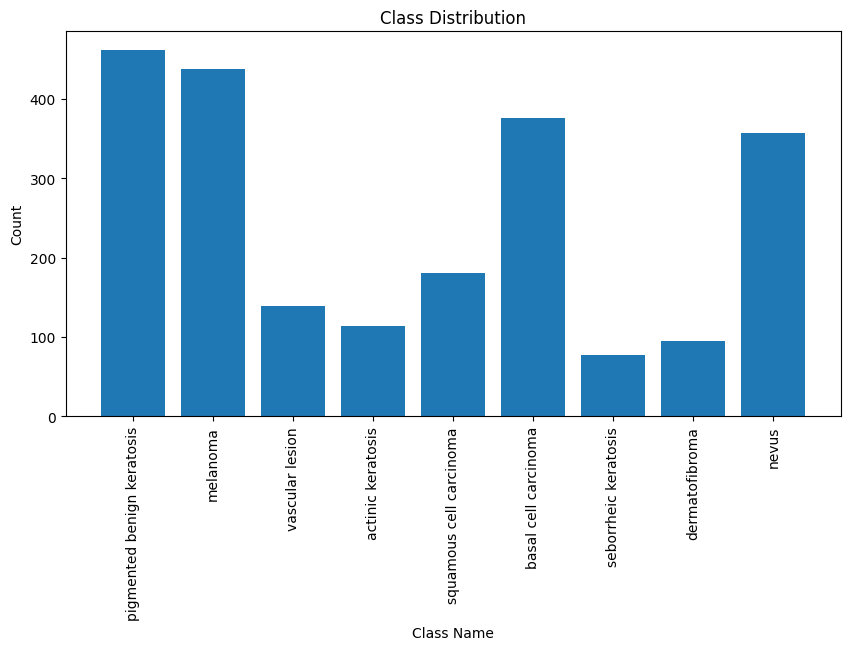

In [5]:
all_count = []

# Looping in all classes and counting number of images in all class directory
for class_name in class_names:
    count = len(list(train_set_path.glob(class_name + '/*.jpg')))
    print("Class Name =", class_name)
    print("Count =", count)
    print("\n")
    all_count.append(count)

# Creating DataFrame for storing the counts and class names
dataFrame = pd.DataFrame(list(zip(all_count, class_names)), columns=['count', 'class_name'])

# Creating bar plot
plt.figure(figsize=(10, 5))
plt.bar(dataFrame['class_name'], dataFrame['count'])

# Rotating x-axis labels for better readability
plt.xticks(rotation=90)

# Setting labels and title
plt.xlabel('Class Name')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

Every class has different number of images due to which class imbalance is there in data which may introduce biasness to the model

# Fixing Class Imbalance

In [6]:
for i in class_names:
    p = Augmentor.Pipeline(train_set_path / i, output_directory='/kaggle/working/data/' + i + '/output/')
    p.rotate(probability=0.8, max_left_rotation=10, max_right_rotation=10)
    p.rotate90(probability=0.1)
    p.flip_left_right(probability=0.4)
    p.flip_top_bottom(probability=0.4)
    p.sample(1000)

Initialised with 462 image(s) found.
Output directory set to /kaggle/working/data/pigmented benign keratosis/output/.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7A8CFADB7F70>: 100%|██████████| 1000/1000 [00:13<00:00, 72.20 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /kaggle/working/data/melanoma/output/.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7A8CFB4B26E0>: 100%|██████████| 1000/1000 [01:12<00:00, 13.74 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /kaggle/working/data/vascular lesion/output/.

Processing <PIL.Image.Image image mode=RGB size=450x600 at 0x7A8CFBA1D180>: 100%|██████████| 1000/1000 [00:14<00:00, 71.12 Samples/s]


Initialised with 114 image(s) found.
Output directory set to /kaggle/working/data/actinic keratosis/output/.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7A8CFAD8A980>: 100%|██████████| 1000/1000 [00:13<00:00, 75.65 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /kaggle/working/data/squamous cell carcinoma/output/.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7A8CFADB54E0>: 100%|██████████| 1000/1000 [00:14<00:00, 71.13 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /kaggle/working/data/basal cell carcinoma/output/.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7A8CFA7A6BF0>: 100%|██████████| 1000/1000 [00:13<00:00, 76.08 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /kaggle/working/data/seborrheic keratosis/output/.

Processing <PIL.Image.Image image mode=RGB size=768x1024 at 0x7A8CFAAB0220>: 100%|██████████| 1000/1000 [00:33<00:00, 30.03 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /kaggle/working/data/dermatofibroma/output/.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7A8CFADB5CF0>: 100%|██████████| 1000/1000 [00:13<00:00, 71.61 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /kaggle/working/data/nevus/output/.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7A8D57857F70>: 100%|██████████| 1000/1000 [01:10<00:00, 14.18 Samples/s]


In [7]:
output_dir = pathlib.Path('/kaggle/working/data/')
image_count_train = len(list(output_dir.glob('*/output/*.jpg')))
print(image_count_train)

9000


Class Name = pigmented benign keratosis
Count = 1000


Class Name = melanoma
Count = 1000


Class Name = vascular lesion
Count = 1000


Class Name = actinic keratosis
Count = 1000


Class Name = squamous cell carcinoma
Count = 1000


Class Name = basal cell carcinoma
Count = 1000


Class Name = seborrheic keratosis
Count = 1000


Class Name = dermatofibroma
Count = 1000


Class Name = nevus
Count = 1000




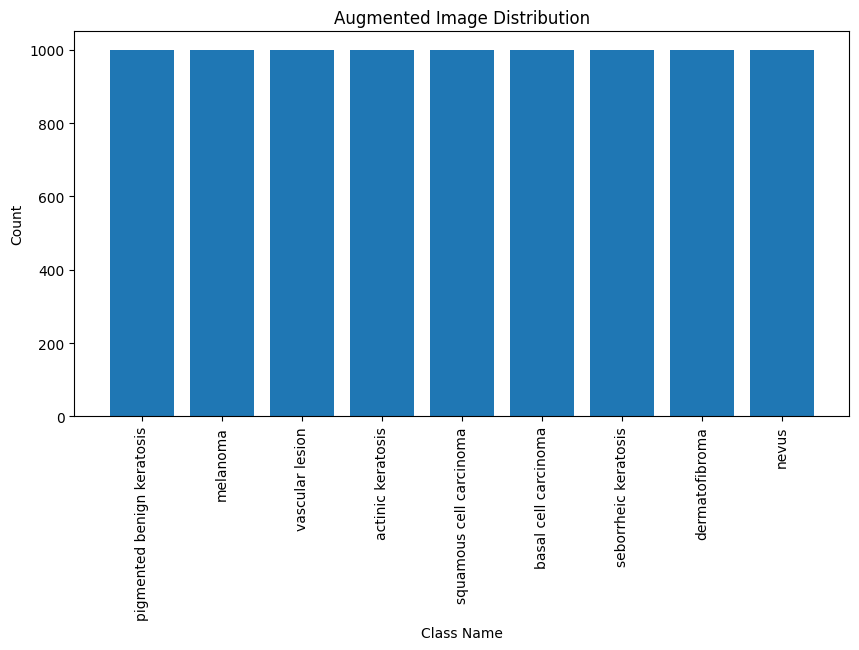

In [8]:
# Counting the total number of images in the output directories after augmentation
all_count = []

# Looping through each class and counting the augmented images inside the output subdirectories
for class_name in class_names:
    count = len(list(output_dir.glob(f'{class_name}/output/*.jpg')))
    print("Class Name =", class_name)
    print("Count =", count)
    print("\n")
    all_count.append(count)

# Creating DataFrame for storing the counts and class names
dataFrame = pd.DataFrame(list(zip(all_count, class_names)), columns=['count', 'class_name'])

# Creating bar plot for class distribution of augmented images
plt.figure(figsize=(10, 5))
plt.bar(dataFrame['class_name'], dataFrame['count'])

# Rotating x-axis labels for better readability
plt.xticks(rotation=90)

# Setting labels and title for the plot
plt.xlabel('Class Name')
plt.ylabel('Count')
plt.title('Augmented Image Distribution')
plt.show()


# Preparing the Data

In [9]:
batch_size = 32
img_width = 224
img_height = 224
random_seed = 123
random.seed(random_seed)
num_classes = len(class_names)

In [10]:
train_set = tf.keras.preprocessing.image_dataset_from_directory(
    output_dir,
    seed = 123,
    validation_split = 0.2,
    subset = 'training',
    image_size = (img_height, img_width),
    batch_size = batch_size
)

Found 9000 files belonging to 9 classes.
Using 7200 files for training.


In [11]:
validation_set = tf.keras.preprocessing.image_dataset_from_directory(
    output_dir,
    seed = 123,
    validation_split = 0.2,
    subset = 'validation',
    image_size = (img_height, img_width),
    batch_size = batch_size
)

Found 9000 files belonging to 9 classes.
Using 1800 files for validation.


In [12]:
test_set = tf.keras.preprocessing.image_dataset_from_directory(
    test_set_path,
    seed = 123,
    validation_split = 0.9,
    subset = 'validation',
    image_size = (img_height, img_width),
    batch_size = batch_size
)

Found 118 files belonging to 9 classes.
Using 106 files for validation.


# Model Building

In [13]:
# # Function for Convolution Layer
# def conv_layer(channel):

#   layer = models.Sequential()
#   layer.add(layers.Conv2D(channel, (3, 3), padding='same'))
#   layer.add(layers.BatchNormalization())
#   layer.add(layers.Activation('relu'))

#   return layer

# # Function for Convolution Block
# def conv_block(num_layers, hidden_channels, out_channels = None):

#   assert num_layers > 2
#   block = models.Sequential()

#   for _ in range(num_layers-1):
#     block.add(conv_layer(hidden_channels))
#   block.add(conv_layer(out_channels if out_channels is not None else hidden_channels))

#   return block


# model = models.Sequential([
#     layers.Rescaling(1.0 / 255, input_shape=(img_height, img_width, 3))
# ])

# model.add(conv_block(3, 64))
# model.add(layers.MaxPool2D(2,2))

# model.add(conv_block(6, 128))
# model.add(layers.MaxPool2D(2,2))

# model.add(conv_block(3, 256))

# model.add(layers.Flatten())
# model.add(layers.Dropout(0.20))

# model.add(layers.Dense(num_classes, activation='softmax'))

# model.summary()




model = models.Sequential([
    layers.Rescaling(1.0 / 255, input_shape=(img_height, img_width, 3))  # Input rescaling layer
])

# First convolution block with 3 layers and MaxPooling
model.add(layers.Conv2D(64, (3, 3), padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))

model.add(layers.Conv2D(64, (3, 3), padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))

model.add(layers.Conv2D(64, (3, 3), padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))

model.add(layers.MaxPool2D(2, 2))  # MaxPooling layer

# Second convolution block with 6 layers and MaxPooling
model.add(layers.Conv2D(128, (3, 3), padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))

model.add(layers.Conv2D(128, (3, 3), padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))

model.add(layers.Conv2D(128, (3, 3), padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))

model.add(layers.Conv2D(128, (3, 3), padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))

model.add(layers.Conv2D(128, (3, 3), padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))

model.add(layers.Conv2D(128, (3, 3), padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))

model.add(layers.MaxPool2D(2, 2))  # MaxPooling layer

# Third convolution block with 3 layers
model.add(layers.Conv2D(256, (3, 3), padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))

model.add(layers.Conv2D(256, (3, 3), padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))

model.add(layers.Conv2D(256, (3, 3), padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))

# Flatten, Dropout, and Dense layers
model.add(layers.Flatten())
model.add(layers.Dropout(0.20))  # Dropout layer

model.add(layers.Dense(num_classes, activation='softmax'))  # Fully connected layer with softmax activation

# Model summary
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 224, 224, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 224, 224, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 224, 224, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 224, 224, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 224, 224, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 224, 224, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 112, 112, 128)       │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 112, 112, 128)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 112, 112, 128)       │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 112, 112, 128)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 112, 112, 128)       │             5

 Total params: 9,595,017 (36.60 MB)

 Trainable params: 9,591,561 (36.59 MB)

 Non-trainable params: 3,456 (13.50 KB)

# Callbacks

In [14]:
initial_lr = 0.001024
decay_factor = 0.75
drop_epoch = 10


def step_decay_schedule(epoch):
    return initial_lr * (decay_factor ** (epoch // drop_epoch))


lr_schedule = tf.keras.callbacks.LearningRateScheduler(step_decay_schedule)

In [15]:
ckpt_path = '/kaggle/working/training_checkpoints/cktps'

checkpoint_prefix = os.path.join(ckpt_path, 'ckpt.keras')

checkpoint_callback = ModelCheckpoint(filepath=checkpoint_prefix,
                                      save_weights_only=False,
                                      verbose=1)

# Model Training and Saving

In [16]:
model.compile(
    optimizer = 'adam',
    loss = SparseCategoricalCrossentropy(from_logits = False),
    metrics = ['accuracy']
)

In [17]:
epochs = 50

history = model.fit(
    train_set,
    validation_data = validation_set,
    epochs = epochs,
    callbacks = [lr_schedule, checkpoint_callback]
)

Epoch 1/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step - accuracy: 0.1674 - loss: 36.0486
Epoch 1: saving model to /kaggle/working/training_checkpoints/cktps/ckpt.keras
225/225 ━━━━━━━━━━━━━━━━━━━━ 107s 360ms/step - accuracy: 0.1675 - loss: 35.9768 - val_accuracy: 0.1544 - val_loss: 2.3680 - learning_rate: 0.0010
Epoch 2/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step - accuracy: 0.2279 - loss: 3.4452
Epoch 2: saving model to /kaggle/working/training_checkpoints/cktps/ckpt.keras
225/225 ━━━━━━━━━━━━━━━━━━━━ 77s 341ms/step - accuracy: 0.2280 - loss: 3.4435 - val_accuracy: 0.1189 - val_loss: 2.7046 - learning_rate: 0.0010
Epoch 3/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step - accuracy: 0.3022 - loss: 2.4015
Epoch 3: saving model to /kaggle/working/training_checkpoints/cktps/ckpt.keras
225/225 ━━━━━━━━━━━━━━━━━━━━ 77s 341ms/step - accuracy: 0.3023 - loss: 2.4003 - val_accuracy: 0.2472 - val_loss: 2.1187 - learning_rate: 0.0010
Epoch 4/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step - accuracy

In [18]:
model.save('/kaggle/working/model/model.h5')

# Visualization For Identifying Issues

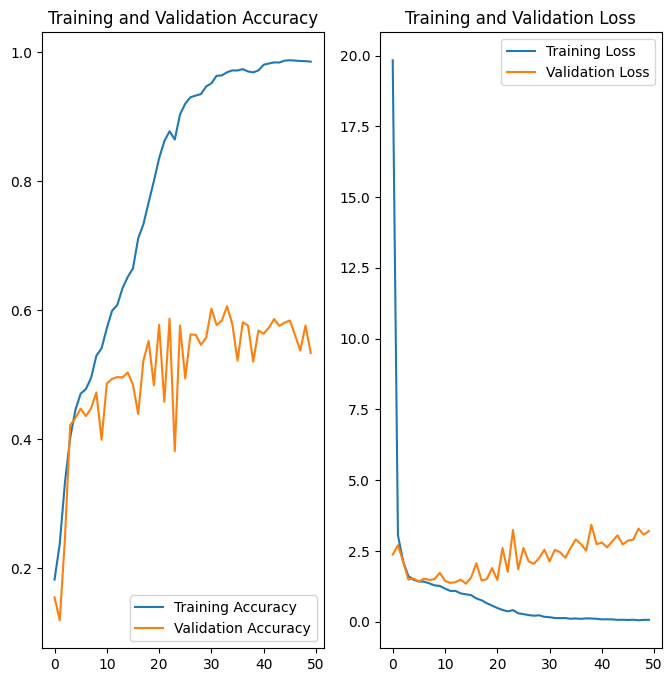

In [19]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Model Evaluation

In [20]:
(eval_loss, eval_accuracy) = model.evaluate(test_set, batch_size=batch_size, \
                                            verbose=1)

4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 0.2367 - loss: 6.1381
